In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
true=pd.read_csv('True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [4]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
true['Prediction']=np.ones(true.shape[0])

In [7]:
fake=pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [9]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
fake['Prediction']=np.zeros(fake.shape[0])

In [12]:
data=pd.concat([true,fake])

###### Note: Created a dataframe with 'Predicion' as a new column with 1 or 0 as its value for Real or Fake news respectively.

In [13]:
data.head()

,title,text,subject,date,Prediction
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1.0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1.0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1.0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1.0


In [14]:
data.shape

(44898, 5)

<AxesSubplot:xlabel='Prediction', ylabel='count'>

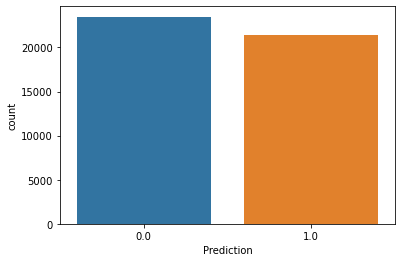

In [15]:
sns.countplot(data['Prediction'])

######  Feature Extraction

In [16]:
data['Details']=data['title']+' '+data['text']+' '+data['subject']

In [17]:
data.drop(['title','text','subject'],axis=1,inplace=True)

In [18]:
data.head()

,date,Prediction,Details
0,"December 31, 2017",1.0,"As U.S. budget fight looms, Republicans flip t..."
1,"December 29, 2017",1.0,U.S. military to accept transgender recruits o...
2,"December 31, 2017",1.0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,"December 30, 2017",1.0,FBI Russia probe helped by Australian diplomat...
4,"December 29, 2017",1.0,Trump wants Postal Service to charge 'much mor...


In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [20]:
cv=CountVectorizer(stop_words='english')

In [21]:
words=cv.fit_transform(data['Details'])

In [22]:
cv.vocabulary_

{'budget': 21299,
 'fight': 42283,
 'looms': 66465,
 'republicans': 92124,
 'flip': 43015,
 'fiscal': 42621,
 'script': 97249,
 'washington': 117060,
 'reuters': 92688,
 'head': 50522,
 'conservative': 28184,
 'republican': 92120,
 'faction': 40890,
 'congress': 28044,
 'voted': 116244,
 'month': 73293,
 'huge': 53049,
 'expansion': 40334,
 'national': 75527,
 'debt': 31837,
 'pay': 82688,
 'tax': 107012,
 'cuts': 30554,
 'called': 22402,
 'sunday': 105124,
 'urged': 114210,
 'restraint': 92469,
 '2018': 4162,
 'keeping': 60715,
 'sharp': 98777,
 'pivot': 84555,
 'way': 117250,
 'representative': 92053,
 'mark': 68935,
 'meadows': 70334,
 'speaking': 102303,
 'cbs': 23739,
 'face': 40808,
 'nation': 75526,
 'drew': 36050,
 'hard': 49919,
 'line': 65651,
 'federal': 41747,
 'spending': 102430,
 'lawmakers': 64217,
 'bracing': 20177,
 'battle': 16541,
 'january': 57748,
 'return': 92655,
 'holidays': 52193,
 'wednesday': 117492,
 'begin': 17056,
 'trying': 111292,
 'pass': 82337,
 'likel

###### Feature Selection

In [23]:
X=words

In [24]:
y=data['Prediction'].values

###### Modelling

In [25]:
from sklearn.model_selection import train_test_split

We will create Validation set alongwith the Train, Test set, which we can use for finding the best model and then after hyperparameter tuning finally we can apply the best suited model on the test set which will be completely unknown to the model.

In [26]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.30, random_state=101)

In [27]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.15, random_state=101)

In [28]:
tfidf=TfidfTransformer()

In [29]:
tfidf_X_train=tfidf.fit_transform(X_train)

In [30]:
tfidf_X_val=tfidf.fit_transform(X_val)

In [31]:
tfidf_X_test=tfidf.transform(X_test)

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [33]:
lr_model=LogisticRegression()
lr_model.fit(tfidf_X_train,y_train)

LogisticRegression()

In [34]:
mnb_model=MultinomialNB()
mnb_model.fit(tfidf_X_train,y_train)

MultinomialNB()

In [35]:
rfc_model=RandomForestClassifier()
rfc_model.fit(tfidf_X_train,y_train)

RandomForestClassifier()

In [36]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [37]:
def report(model):
    preds = model.predict(tfidf_X_val)
    print(classification_report(preds,y_val))
    plot_confusion_matrix(model,tfidf_X_val,y_val)
    plot_precision_recall_curve(model,tfidf_X_val,y_val)
    plot_roc_curve(model,tfidf_X_val,y_val)

LOGISTIC REGRESSION
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5902
         1.0       0.99      0.99      0.99      5547

    accuracy                           0.99     11449
   macro avg       0.99      0.99      0.99     11449
weighted avg       0.99      0.99      0.99     11449



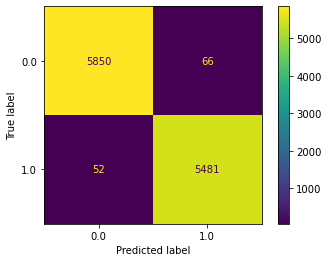

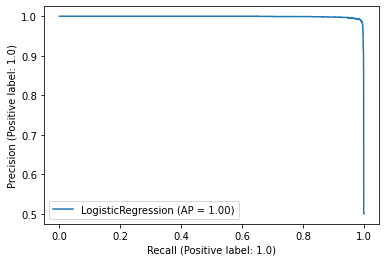

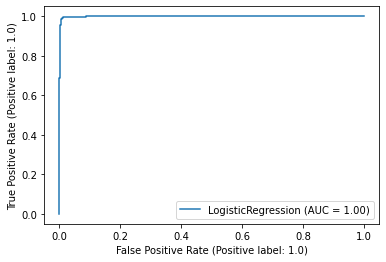

In [38]:
print('LOGISTIC REGRESSION')
report(lr_model)

NAIVE BAYES MODEL
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      6025
         1.0       0.93      0.95      0.94      5424

    accuracy                           0.94     11449
   macro avg       0.94      0.94      0.94     11449
weighted avg       0.94      0.94      0.94     11449



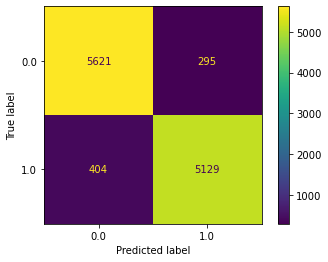

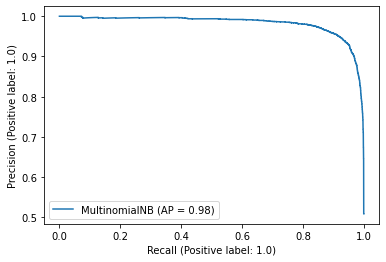

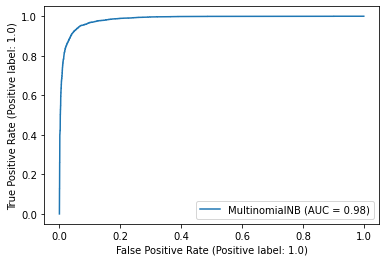

In [39]:
print('NAIVE BAYES MODEL')
report(mnb_model)

RANDOM FOREST CLASSIFIER
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5911
         1.0       1.00      1.00      1.00      5538

    accuracy                           1.00     11449
   macro avg       1.00      1.00      1.00     11449
weighted avg       1.00      1.00      1.00     11449



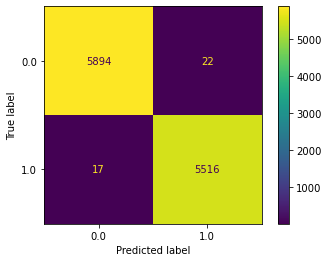

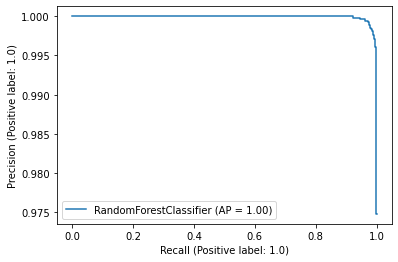

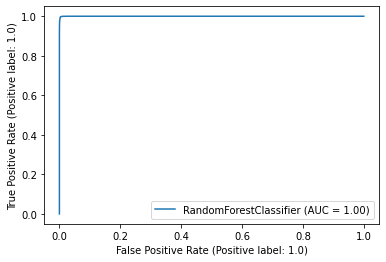

In [40]:
print('RANDOM FOREST CLASSIFIER')
report(rfc_model)

###### Note: Since the model performed well with the default parameters so I will proceed with the model as it is without hyperparameter tuning, for the final predictions.

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1066
         1.0       0.99      1.00      1.00       955

    accuracy                           1.00      2021
   macro avg       1.00      1.00      1.00      2021
weighted avg       1.00      1.00      1.00      2021



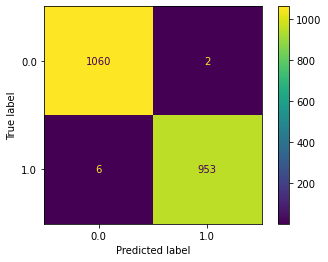

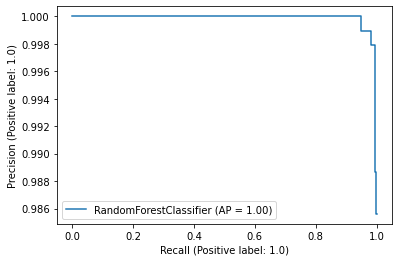

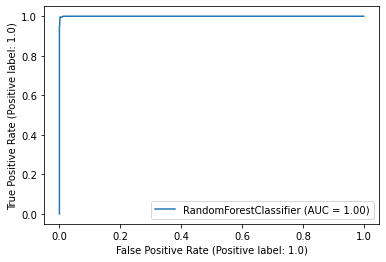

In [41]:
preds = rfc_model.predict(tfidf_X_test)
print(classification_report(preds,y_test))
plot_confusion_matrix(rfc_model,tfidf_X_test,y_test)
plot_precision_recall_curve(rfc_model,tfidf_X_test,y_test)
plot_roc_curve(rfc_model,tfidf_X_test,y_test)